# Gradient Descent Algorithm in Python

##### This here is a step by step notebook for using the Gradient Descent Algorithm in Python with **one hyper parameter** and **one feature**

Basic Setup for MatPlotLib

In [3]:
%matplotlib inline


Importing MatPlot Lib and Initializing the Area/Price DataSet. It is store as a python dictionary with keys are Area and Prices are Values. 

In [126]:
import matplotlib.pyplot as plt
AreaPriceDict = {105.8: 48349, 109.8: 50184, 111.7: 51026, 111.9: 51127, 110.8: 50606, 117.1: 53492, 115.5: 52757, 119.8: 54720, 118.1: 53951, 130.8: 59752, 130.3: 59510, 130.2: 59504, 144.1: 65842, 155.3: 70928, 165.6: 75657, 177.8: 81226, 190.6: 87082, 204.3: 93334, 215.5: 98448, 237.0: 108255, 253.4: 115763, 265.7: 121378, 264.5: 120859, 268.8: 122827, 274.4: 134728, 272.5: 124488, 259.1: 118357, 270.3: 123483, 277.1: 126609, 274.7: 125495, 281.3: 128510, 283.2: 129378, 294.4: 134523, 294.5: 134534, 291.6: 133202, 289.7: 132349, 283.9: 129700, 269.3: 123019, 259.4: 118525, 247.3: 112989, 245.9: 112348, 254.0: 116051, 254.2: 116154, 252.9: 115545, 260.6: 119057, 256.6: 117234, 255.7: 116836, 249.2: 113863, 257.6: 117691, 255.2: 116610, 253.3: 115716, 251.3: 114828, 251.5: 114882, 255.3: 116624, 250.1: 114264, 255.9: 116909, 254.8: 116417, 262.0: 119702, 273.8: 125106, 267.0: 121990, 265.9: 121486, 274.1: 134584, 274.0: 125189, 272.2: 133632, 271.8: 124167, 271.1: 123864, 271.2: 123914, 271.6: 124074, 272.0: 124284, 270.1: 123397, 278.4: 127213, 272.6: 124535, 111.1: 54523, 114.3: 56103, 115.7: 56824, 117.9: 57863, 117.5: 57669, 123.7: 60754, 120.1: 58942, 124.3: 61037, 127.8: 62725, 132.2: 64894, 133.9: 65754, 137.7: 67591, 142.9: 70166, 155.8: 76498, 167.7: 82357, 186.3: 91480, 185.1: 90877, 205.0: 100625, 215.9: 106016, 226.0: 110961, 237.6: 116673, 262.8: 129018, 271.9: 133494, 284.5: 139688, 284.3: 139585, 286.3: 140549, 290.1: 142424, 297.8: 146209, 302.6: 148585, 307.1: 150785, 308.6: 151530, 316.0: 155159, 318.6: 156429, 315.1: 154695, 309.1: 151747, 297.5: 146074, 286.5: 140634, 259.5: 127412, 268.2: 131675, 279.6: 137275, 277.4: 136208, 287.4: 141093, 278.9: 136906, 269.5: 132302, 274.9: 134967, 281.5: 138228, 279.7: 137340, 273.9: 134467, 269.1: 132128, 273.7: 134362, 274.2: 134633, 266.9: 131046, 267.8: 131470, 271.5: 133283, 280.3: 137634, 286.6: 140684, 284.7: 139775, 290.6: 142661, 295.9: 145265, 290.9: 142816, 288.5: 141647, 300.2: 147387, 296.7: 145673, 292.1: 143390, 294.1: 144361, 302.7: 148587, 307.2: 150823, 303.7: 149124, 301.4: 147983, 309.5: 151947, 308.5: 151482}


This is the Data Normalization function which we will use later for Graphing purposes

In [102]:
def Normalize(Data):
    Norm = []
    Max = max(Data)
    for i in range(len(Data)):
        Norm.append(Data[i]/Max)
    return Norm

Converted the Price and Area from the dictionary into separate lists for handling. Plus normalized them for futher graphs.

In [123]:
Area = list(AreaPriceDict.keys())
Price = list(AreaPriceDict.values())
AreaNorm = Normalize(Area)
PriceNorm = Normalize(Price)

print("Area :",Area,"Price",Price)
print(len(Area),len(Price))

Area : [105.8, 109.8, 111.7, 111.9, 110.8, 117.1, 115.5, 119.8, 118.1, 130.8, 130.3, 130.2, 144.1, 155.3, 165.6, 177.8, 190.6, 204.3, 215.5, 237.0, 253.4, 265.7, 264.5, 268.8, 274.4, 272.5, 259.1, 270.3, 277.1, 274.7, 281.3, 283.2, 294.4, 294.5, 291.6, 289.7, 283.9, 269.3, 259.4, 247.3, 245.9, 254.0, 254.2, 252.9, 260.6, 256.6, 255.7, 249.2, 257.6, 255.2, 253.3, 251.3, 251.5, 255.3, 250.1, 255.9, 254.8, 262.0, 273.8, 267.0, 265.9, 274.1, 274.0, 272.2, 271.8, 271.1, 271.2, 271.6, 272.0, 270.1, 278.4, 272.6, 111.1, 114.3, 115.7, 117.9, 117.5, 123.7, 120.1, 124.3, 127.8, 132.2, 133.9, 137.7, 142.9, 155.8, 167.7, 186.3, 185.1, 205.0, 215.9, 226.0, 237.6, 262.8, 271.9, 284.5, 284.3, 286.3, 290.1, 297.8, 302.6, 307.1, 308.6, 316.0, 318.6, 315.1, 309.1, 297.5, 286.5, 259.5, 268.2, 279.6, 277.4, 287.4, 278.9, 269.5, 274.9, 281.5, 279.7, 273.9, 269.1, 273.7, 274.2, 266.9, 267.8, 271.5, 280.3, 286.6, 284.7, 290.6, 295.9, 290.9, 288.5, 300.2, 296.7, 292.1, 294.1, 302.7, 307.2, 303.7, 301.4, 309.5

## Plot of Area vs Price in the Data

Text(0.5,1,'Price and Area Graph(Non Normalized.)')

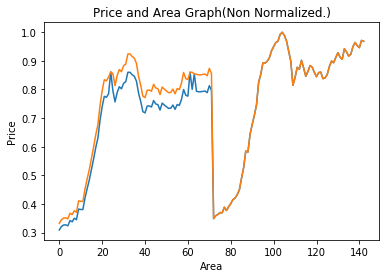

In [125]:
plt.plot(PriceNorm)
plt.plot(AreaNorm)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price and Area Graph(Non Normalized.)')


# Pseudo Code Algorithm.

First get all Area Sizes.


Initiate Theta0 and Thetha 1 randomly.


Calculate  Means Square Error of all data points for the Thetha Value.


Compare that RMS Error for the intial thetha values and find the gradient(slope or derivate) of the thetha value.


if the Gradient is positive then subtract gradient from the thetha.
if the Gradient is negative then add gradient to the thetha.


By adding and subtracting the Gradient value, we are trying to reach the 0 or the trough of the parabola or 
"point of minimum error". Where the Gradient is 0 or very near it.



# Actual Code

Intializing Values for Theta's and one Alpha parameter.

In [91]:
Theta0 = 0
Theta1 = 0
Alpha = 0.000032

These are lists which will be used later on for plotting of the Theta Values.

In [112]:
GradT0L = []
GradT1L = []

This is the Hypothesis Function.

In [92]:
def Prediction(T0,T1,Input):
    Pre = T0 + (T1*Input)
    return Pre

This is the Actual Gradient Descent Function.

In [127]:
def GD(T0,T1,Input,Actual):
    granT1=0
    granT0=0
    while(True):
        size = len(Input)
        
        for i in range(size):
            granT0 = granT0 +((T0 + T1*Input[i]) - Actual[i])
            granT1 = granT1 +((T0+T1*Input[i]) - Actual[i])*Input[i]
        granT0 = granT0/size
        granT1 = granT1/size
        GradT0L.append(granT0)
        GradT1L.append(granT1)
        print("First Gradient(Y Intercept):",granT0,"Second Gradient:",granT1)
        T0 = T0 - Alpha*granT0
        T1 = T1 - Alpha*granT1
        breaker = abs(granT1)
        if(breaker < 0.1):
            break
    print("Values of Gradient",granT0,granT1)
    return [T0,T1]

Using the Gradient descent algorithm on the Data Set

In [129]:
T0,T1 = GD(Theta0,Theta1,Area,Price)

First Gradient(Y Intercept): -114248.97202797203 Second Gradient: -29435225.213286716
First Gradient(Y Intercept): 111437.1967822525 Second Gradient: 28628786.761931043
First Gradient(Y Intercept): -107264.67628098722 Second Gradient: -27638604.061677784
First Gradient(Y Intercept): 103867.20890627682 Second Gradient: 26681186.346579235
First Gradient(Y Intercept): -99950.91035862124 Second Gradient: -25756925.862329084
First Gradient(Y Intercept): 96806.75405158996 Second Gradient: 24864680.09049653
First Gradient(Y Intercept): -93135.03743654583 Second Gradient: -24003345.038482428
First Gradient(Y Intercept): 90226.98813917751 Second Gradient: 23171844.98222839
First Gradient(Y Intercept): -86783.20224762209 Second Gradient: -22369151.35670475
First Gradient(Y Intercept): 84095.18525150574 Second Gradient: 21594261.33188103
First Gradient(Y Intercept): -80863.81221602051 Second Gradient: -20846216.71216935
First Gradient(Y Intercept): 78380.8472074945 Second Gradient: 20124082.59936

First Gradient(Y Intercept): 135.68142746001618 Second Gradient: -6731.782854020474
First Gradient(Y Intercept): 187.10050405933262 Second Gradient: 6497.351129951757
First Gradient(Y Intercept): 137.46196273565712 Second Gradient: -6273.5130031649915
First Gradient(Y Intercept): 185.38030684052399 Second Gradient: 6054.956190050746
First Gradient(Y Intercept): 139.12122929382102 Second Gradient: -5846.443041697093
First Gradient(Y Intercept): 183.77717748053615 Second Gradient: 5642.68034553831
First Gradient(Y Intercept): 140.66748334137836 Second Gradient: -5448.448821357453
First Gradient(Y Intercept): 182.28314577540914 Second Gradient: 5258.4730306878455
First Gradient(Y Intercept): 142.10841898676657 Second Gradient: -5077.5508099845265
First Gradient(Y Intercept): 180.8907841479686 Second Gradient: 4900.423286220982
First Gradient(Y Intercept): 143.45120650881296 Second Gradient: -4731.904245749563
First Gradient(Y Intercept): 179.5931707047135 Second Gradient: 4566.75025462428

## PLOTTING OF THETA VALUES.

Text(0.5,1,'Value of Theta 0 Oscillating')

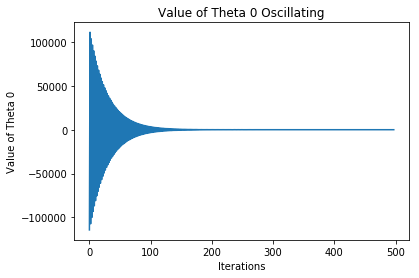

In [120]:
plt.plot(GradT0L)
plt.xlabel('Iterations')
plt.ylabel('Value of Theta 0')
plt.title('Value of Theta 0 Oscillating')

Text(0.5,1,'Value of Theta 1 Oscillating')

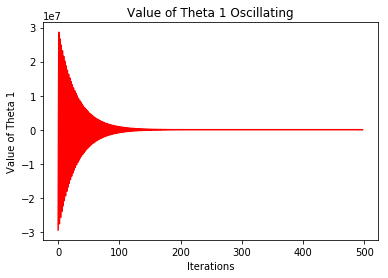

In [122]:
plt.plot(GradT1L,'r')
plt.xlabel('Iterations')
plt.ylabel('Value of Theta 1')
plt.title('Value of Theta 1 Oscillating')

# Hypothesized Price Values based on Theta values of lowest gradient

Construct a Predicted Price List

In [131]:
HPrice = []

for i in range(len(Area)):
    HPrice.append(Prediction(T0,T1,Area[i]))
    
HPriceNorm = Normalize(HPrice)

Plotting of our Predicted Price

Text(0.5,1,'Price and Area Graph(Actual)')

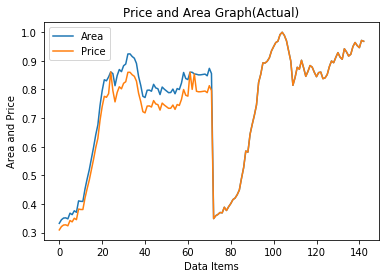

In [158]:
plt.plot(AreaNorm)
plt.plot(PriceNorm)
plt.legend(('Area','Price'))
plt.xlabel('Data Items')
plt.ylabel('Area and Price')
plt.title('Price and Area Graph(Actual)')

Text(0.5,1,'Price and Area Graph(Hypothesized)')

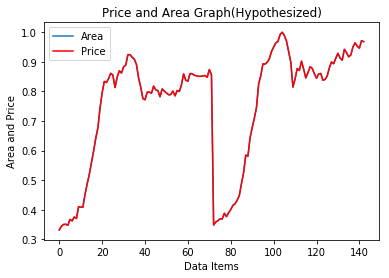

In [159]:
plt.plot(AreaNorm)
plt.plot(HPriceNorm,'r')
plt.legend(('Area','Price'))
plt.xlabel('Data Items')
plt.ylabel('Area and Price')
plt.title('Price and Area Graph(Hypothesized)')

Text(0.5,1,'Price and Area Graph(Actual)')

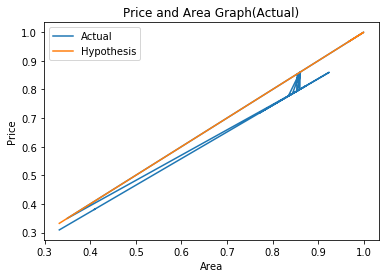

In [165]:
plt.plot(AreaNorm,PriceNorm)
plt.plot(AreaNorm,HPriceNorm)
plt.legend(('Actual','Hypothesis'))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price and Area Graph(Actual)')

# And its done

<img src="https://userscontent2.emaze.com/images/5469dec9-ed0b-42d8-a1ac-ed74ec457f2e/193a7518-2459-42fc-ab93-138f283ae7c8.gif">